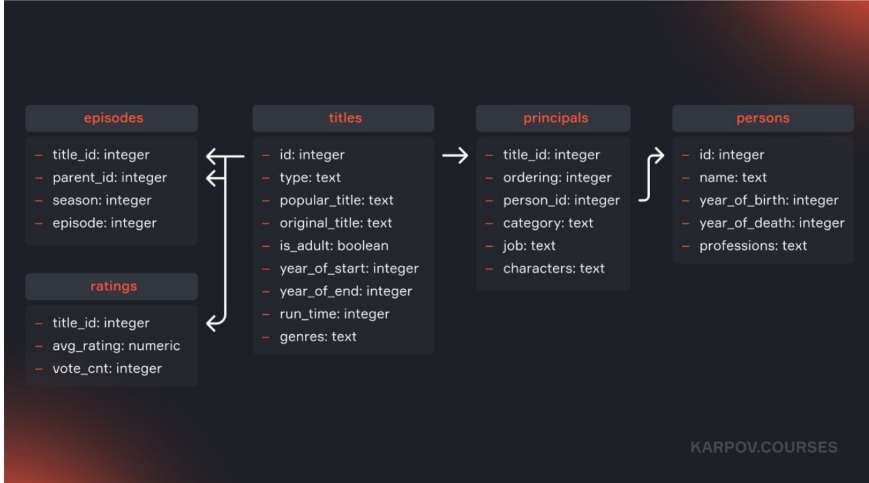

Задание 1  
Напишите SQL-запрос, который объединит в себе два запроса в одно поле с именем role:

— все уникальные категории из таблицы principals

— все уникальные профессии из таблицы persons за исключением тех, в которых есть запятая.

Результат отсортируйте в лексикографическом порядке.

In [ ]:
SELECT DISTINCT category as role
FROM   principals
UNION all
SELECT DISTINCT professions
FROM   persons
WHERE  professions not like '%,%'
ORDER BY 1;

Задание 2  
Проведите дедупликацию в запросе из предыдущего задания.

In [ ]:
SELECT DISTINCT category as role
FROM   principals
UNION
SELECT DISTINCT professions
FROM   persons
WHERE  professions not like '%,%'
ORDER BY 1;

Задание 3  
Напишите SQL-запрос, который объединит таблицы titles и ratings. Выведите поля:

— original_title из таблицы titles

— type из таблицы titles

— year_of_start из таблицы titles

— avg_rating из таблицы ratings

— vote_cnt из таблицы ratings

Результат отсортируйте по возрастанию original_title, type, year_of_start, avg_rating.

In [ ]:
SELECT t.original_title,
       t.type,
       t.year_of_start,
       r.avg_rating,
       r.vote_cnt
FROM   titles t join ratings r
        ON t.id = r.title_id
ORDER BY t.original_title asc, t.type asc, t.year_of_start asc, r.avg_rating asc;

Задание 4  
Напишите SQL-запрос, который выведет поле title_id тех строк из таблицы ratings, для которых нет соответствия в таблице titles. Результат отсортируйте в порядке убывания.

In [ ]:
SELECT r.title_id
FROM   ratings r
    LEFT JOIN titles t
        ON r.title_id = t.id
WHERE  t.id is null
ORDER BY r.title_id desc;

Задание 5  
Напишите SQL-запрос, который находит произведения с типом movie, у которых есть клоны с таким же original_title. Для этого объедините таблицу titles с собой по названию произведения, исключив строки, которые поджойнились сами на себя.

Поля к выводу:

- original_title,

- type оригинала (с алиасом type_1),

- type клона (с алиасом type_2),

- year_of_start оригинала (с алиасом year_of_start_1),

- year_of_start клона  (с алиасом year_of_start_2).

Результат отсортируйте по возрастанию original_title, type_1, type_2, year_of_start_1, year_of_start_2


In [ ]:
SELECT t1.original_title,
       t1.type as type_1,
       t2.type as type_2,
       t1.year_of_start as year_of_start_1,
       t2.year_of_start as year_of_start_2
FROM   titles t1 join titles t2
        ON t1.original_title = t2.original_title
WHERE  t1.type = 'movie'
   and t1.id <> t2.id
ORDER BY t1.original_title asc, type_1 asc, type_2 asc, year_of_start_1 asc, year_of_start_2 asc;

Задание 6  
Напишите SQL-запрос, который объединяет таблицы titles и ratings и выводит поля original_title и year_of_start из таблицы titles и vote_cnt из таблицы ratings в порядке убывания vote_cnt. Выберите только те записи, у которых средний рейтинг (avg_rating) равен 10.

In [ ]:
SELECT t.original_title, t.year_of_start, r.vote_cnt
  FROM titles AS t
  LEFT JOIN ratings AS r
    ON t.id = r.title_id
 WHERE r.avg_rating = 10
 ORDER BY r.vote_cnt DESC

Задание 7  
Напишите SQL-запрос, который выводит id произведений из таблицы titles, для которых не имеется данных об эпизодах из таблицы episodes.

Для этого объедините эти две таблицы по полю title_id и выберите только те записи, где поле episode из таблицы episodes имеет значение NULL, что указывает на отсутствие данных об эпизодах для соответствующего произведения.

Результат отсортируйте по возрастанию id.

In [ ]:
SELECT t.id
FROM   titles t
    LEFT JOIN episodes e
        ON t.id = e.title_id
WHERE  e.episode is null
ORDER BY t.id asc;